In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [8]:
# Only get Data Analyst jobs in United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

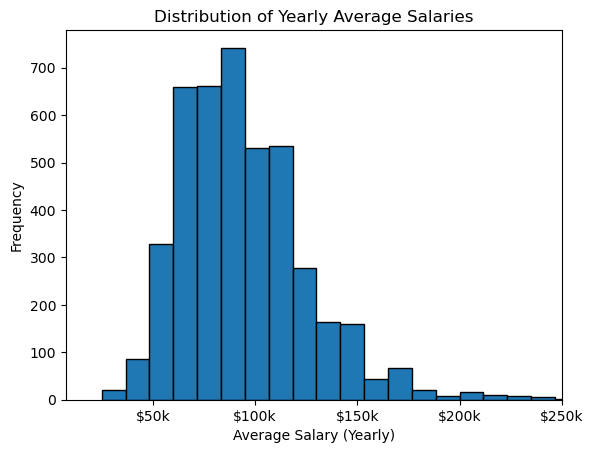

In [16]:
from matplotlib.ticker import FuncFormatter

# formatting function to convert values ​​to thousands with a 'k'
def format_salary(value, _):
    return f'${value/1000:.0f}k'

ax = df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Yearly Average Salaries')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Frequency')

# Apply x-axis formatting
ax.xaxis.set_major_formatter(FuncFormatter(format_salary))
ax.set_xlim(right=250000)

plt.show()
